# **MLPP25 // Mini Project #4**



## Outcomes of gentrification: local changes to median income

<img src="https://cdn.theatlantic.com/assets/media/img/mt/2015/08/20720085886_db5d1f89e8_o/lead_720_405.jpg?mod=1533691764" width=500>

---

In class we discussed the definition of gentrification and the outcomes associated with that process.  Our specific example was the changing demographic makeup of Philadelphia over the period of 2000 to 2016.  In this assignment, we'll be doing an identical comparison, but considering local changes to median income.



### **PART 1 - Loading and Working With the Census Data**


<b> Link your google drive and install geopandas. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas


<b> Load in the pre-cleaned 2000 median income data from the `data/census/income/` directory <u>as well as</u> the 2000 and 2016 shapefiles (in the `data/census/ctshapes` directory).  Make sure that you call the census tract GeoDataFrames `ct00` and `ct16`.</b>

In [ ]:
import geopandas as gpd
import pandas as pd

income_2000 = pd.read_csv('/content/drive/Shareddrives/mlpp25/data/census/income/census_income_2000.csv')

ct00 = gpd.read_file('/content/drive/Shareddrives/mlpp25/data/census/ctshapes/2000/tr42_d00.shp')
ct16 = gpd.read_file('/content/drive/Shareddrives/mlpp25/data/census/ctshapes/2016/cb_2016_42_tract_500k.shp')

print("2000 Income Data:")
print(income_2000.head())

print("\n2000 Census Tracts (ct00):")
print(ct00.head())

print("\n2016 Census Tracts (ct16):")
print(ct16.head())


2000 Income Data:
      Id2_2000  Median household income in 1999
0  42101000100                          48886.0
1  42101000200                           8349.0
2  42101000300                          40625.0
3  42101000400                          27400.0
4  42101000500                           9620.0

2000 Census Tracts (ct00):
       AREA  PERIMETER  TR42_D00_  TR42_D00_I STATE COUNTY   TRACT     NAME  \
0  0.004057   0.398728          2           1    42    049  011701  0117.01   
1  0.017494   0.558170          3           2    42    049  011702  0117.02   
2  0.000370   0.090991          4           3    42    049    0116     0116   
3  0.002350   0.228274          5           4    42    049  011505  0115.05   
4  0.005081   0.348200          6           5    42    049  011507  0115.07   

  LSAD LSAD_TRANS                                           geometry  
0   TR       None  POLYGON ((-79.76214 42.24141, -79.77252 42.235...  
1   TR       None  POLYGON ((-79.78063 42.23206, 

<b>

Load the 2016 ACS 5-year estimates for the median income for census tracts from `data/census/income/` and drop all rows for which the median income (column `"B19013_001E"`) is equal to `-666666666`.

</b>

In [ ]:
income_2016 = pd.read_csv('/content/drive/Shareddrives/mlpp25/data/census/income/census_income_2016.csv')

income_2016 = income_2016[income_2016['B19013_001E'] != -666666666]
print(income_2016.head())


   B19013_001E        GEOID
0        29770  42101008301
1        31202  42101008302
2        25871  42101006300
3        25369  42101007300
4        56944  42101007900


<b> In the income DataFrames, rename the column `"Median household income in 1999"` to `"income_2000"` and the column `"B19013_001E"` to `"income_2016"` (print the heads of the DataFrames to see if it worked).</b>

In [ ]:
income_2000.rename(columns={"Median household income in 1999": "income_2000"}, inplace=True)
income_2016.rename(columns={"B19013_001E": "income_2016"}, inplace=True)
print("2000 Income DataFrame after renaming:")
print(income_2000.head())

print("\n2016 Income DataFrame after renaming:")
print(income_2016.head())


2000 Income DataFrame after renaming:
      Id2_2000  income_2000
0  42101000100      48886.0
1  42101000200       8349.0
2  42101000300      40625.0
3  42101000400      27400.0
4  42101000500       9620.0

2016 Income DataFrame after renaming:
   income_2016        GEOID
0        29770  42101008301
1        31202  42101008302
2        25871  42101006300
3        25369  42101007300
4        56944  42101007900


In order to compare 2000 dollars to 2016 dollars we need to adjust for inflation.  We could assume a model for inflation, but instead, let's just adjust the 2000 data so that it has the same mean as the 2016 data.

<b> First, plot a histogram of the 2000 incomes and a histogram of the 2016 incomes (on the same plot) each with 50 bins and range 0 to 140000 and `alpha=0.5`. </b>

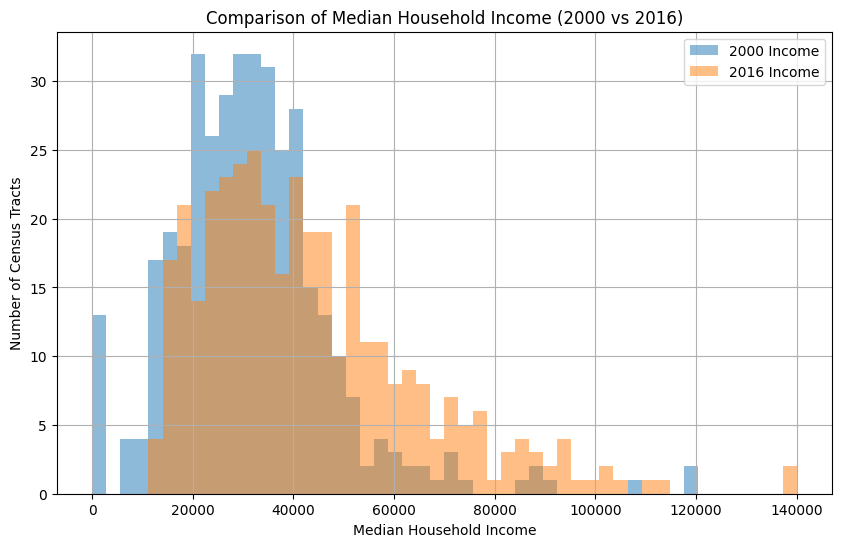

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(income_2000['income_2000'], bins=50, range=(0, 140000), alpha=0.5, label='2000 Income')
plt.hist(income_2016['income_2016'], bins=50, range=(0, 140000), alpha=0.5, label='2016 Income')

plt.xlabel('Median Household Income')
plt.ylabel('Number of Census Tracts')
plt.title('Comparison of Median Household Income (2000 vs 2016)')
plt.legend()
plt.grid(True)
plt.show()


You can see that the 2016 incomes are a bit higher on average.

<b> Now calculate the ratio between the mean 2016 income and mean 2000 income.  Create a column in the 2000 income DataFrame called `"income_2000_adj"` that is `"income_2000"` times that ratio.  Print the mean of `"income_2016"` and `"income_2000_adj"` to make sure that they are now the same and replot the histograms above with the 2016 and 2000 adjusted incomes. </b>

Mean 2016 income: 43380.21
Mean adjusted 2000 income: 43380.21


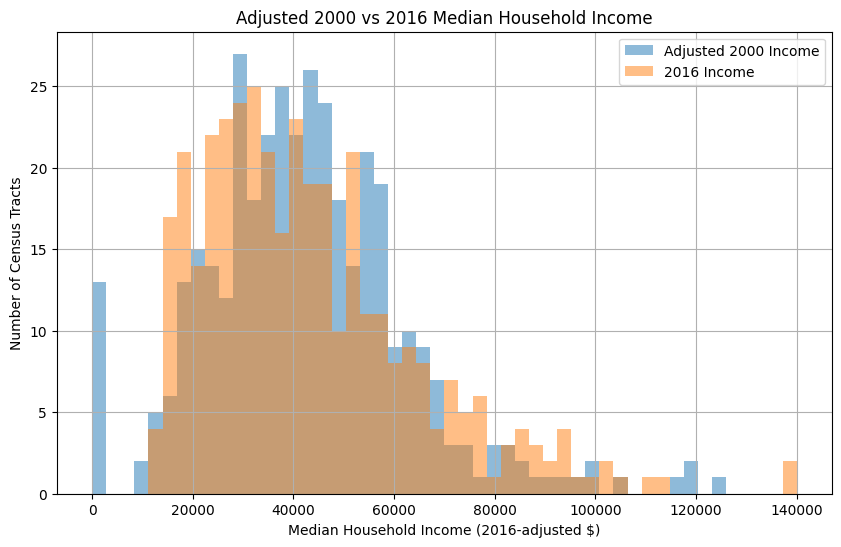

In [ ]:
# Calculate the ratio of means
mean_2016 = income_2016['income_2016'].mean()
mean_2000 = income_2000['income_2000'].mean()
adjustment_ratio = mean_2016 / mean_2000

# Create adjusted income column
income_2000['income_2000_adj'] = income_2000['income_2000'] * adjustment_ratio

# Print means to confirm adjustment
print(f"Mean 2016 income: {mean_2016:.2f}")
print(f"Mean adjusted 2000 income: {income_2000['income_2000_adj'].mean():.2f}")

plt.figure(figsize=(10, 6))
plt.hist(income_2000['income_2000_adj'], bins=50, range=(0, 140000), alpha=0.5, label='Adjusted 2000 Income')
plt.hist(income_2016['income_2016'], bins=50, range=(0, 140000), alpha=0.5, label='2016 Income')

plt.xlabel('Median Household Income (2016-adjusted $)')
plt.ylabel('Number of Census Tracts')
plt.title('Adjusted 2000 vs 2016 Median Household Income')
plt.legend()
plt.grid(True)
plt.show()


The 2000 incomes have now been adjusted to 2016 levels$^{\dagger}$ so that we can now take meaningful differences.

<small>$^{\dagger}$ under several assumptions! </small>

### **PART 2 - Merging and Visualizing the Data**

Now we'd like to make some maps of the income data.  Before we do that, we need to clean up the census tract GeoDataFrames a bit.

<b>As we did in class, create a proper `"GEOID"` for year 2000 and convert both year 2000 and year 2016 `"GEOID"`s into integers.</b>




In [ ]:
print(ct00.columns)


Index(['AREA', 'PERIMETER', 'TR42_D00_', 'TR42_D00_I', 'STATE', 'COUNTY',
       'TRACT', 'NAME', 'LSAD', 'LSAD_TRANS', 'geometry'],
      dtype='object')


In [ ]:
# Create GEOID in ct00 using the correct column names
ct00['GEOID'] = ct00['STATE'].astype(str) + ct00['COUNTY'].astype(str) + ct00['TRACT'].astype(str)

# Convert GEOID to integer
ct00['GEOID'] = ct00['GEOID'].astype(int)

print(ct00[['STATE', 'COUNTY', 'TRACT', 'GEOID']].head())


  STATE COUNTY   TRACT        GEOID
0    42    049  011701  42049011701
1    42    049  011702  42049011702
2    42    049    0116    420490116
3    42    049  011505  42049011505
4    42    049  011507  42049011507


<b> Now, merge the 2000 income data into the 2000 census tract GeoDataFrame, creating a new GeoDataFrame called `inc00sh`, and merge the 2016 income data into the 2016 census tract GeoDataFrame creating a new GeoDataFrame called `inc16sh`.</b>

In [ ]:
print("ct00 columns:", ct00.columns)
print("income_2000 columns:", income_2000.columns)
print("ct16 columns:", ct16.columns)
print("income_2016 columns:", income_2016.columns)


ct00 columns: Index(['AREA', 'PERIMETER', 'TR42_D00_', 'TR42_D00_I', 'STATE', 'COUNTY',
       'TRACT', 'NAME', 'LSAD', 'LSAD_TRANS', 'geometry', 'GEOID'],
      dtype='object')
income_2000 columns: Index(['Id2_2000', 'income_2000', 'income_2000_adj'], dtype='object')
ct16 columns: Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')
income_2016 columns: Index(['income_2016', 'GEOID'], dtype='object')


In [ ]:
print(income_2000.head())


      Id2_2000  income_2000  income_2000_adj
0  42101000100      48886.0     67195.681840
1  42101000200       8349.0     11476.020695
2  42101000300      40625.0     55840.620520
3  42101000400      27400.0     37662.350824
4  42101000500       9620.0     13223.058939


In [ ]:
income_2000.rename(columns={'Id2_2000': 'GEOID'}, inplace=True)

# Ensure it's an integer (match with ct00)
income_2000['GEOID'] = income_2000['GEOID'].astype(int)


In [ ]:
print(income_2000.head())

         GEOID  income_2000  income_2000_adj
0  42101000100      48886.0     67195.681840
1  42101000200       8349.0     11476.020695
2  42101000300      40625.0     55840.620520
3  42101000400      27400.0     37662.350824
4  42101000500       9620.0     13223.058939


In [ ]:
print(ct16.dtypes['GEOID'])
print(income_2016.dtypes['GEOID'])


object
int64


In [ ]:
# Convert income_2016 GEOID to string for a successful merge
income_2016['GEOID'] = income_2016['GEOID'].astype(str)

inc00sh = ct00.merge(income_2000, on='GEOID', how='left')
inc16sh = ct16.merge(income_2016, on='GEOID', how='left')

# Check the first few rows after merging
print(inc00sh.head())
print(inc16sh.head())


       AREA  PERIMETER  TR42_D00_  TR42_D00_I STATE COUNTY   TRACT     NAME  \
0  0.004057   0.398728          2           1    42    049  011701  0117.01   
1  0.017494   0.558170          3           2    42    049  011702  0117.02   
2  0.000370   0.090991          4           3    42    049    0116     0116   
3  0.002350   0.228274          5           4    42    049  011505  0115.05   
4  0.005081   0.348200          6           5    42    049  011507  0115.07   

  LSAD LSAD_TRANS                                           geometry  \
0   TR       None  POLYGON ((-79.76214 42.24141, -79.77252 42.235...   
1   TR       None  POLYGON ((-79.78063 42.23206, -79.77991 42.232...   
2   TR       None  POLYGON ((-79.82202 42.21576, -79.82202 42.215...   
3   TR       None  POLYGON ((-79.90727 42.20936, -79.90287 42.210...   
4   TR       None  POLYGON ((-79.90047 42.18656, -79.90047 42.185...   

         GEOID  income_2000  income_2000_adj  
0  42049011701          NaN              NaN 

<b> Plot the adjusted 2000 incomes on a map with `vmin=20000` and `vmax=120000`.  Do the same for the 2016 incomes.  Make sure to include the legend (colorbar) and add text to indicate what those color values represent.</b>

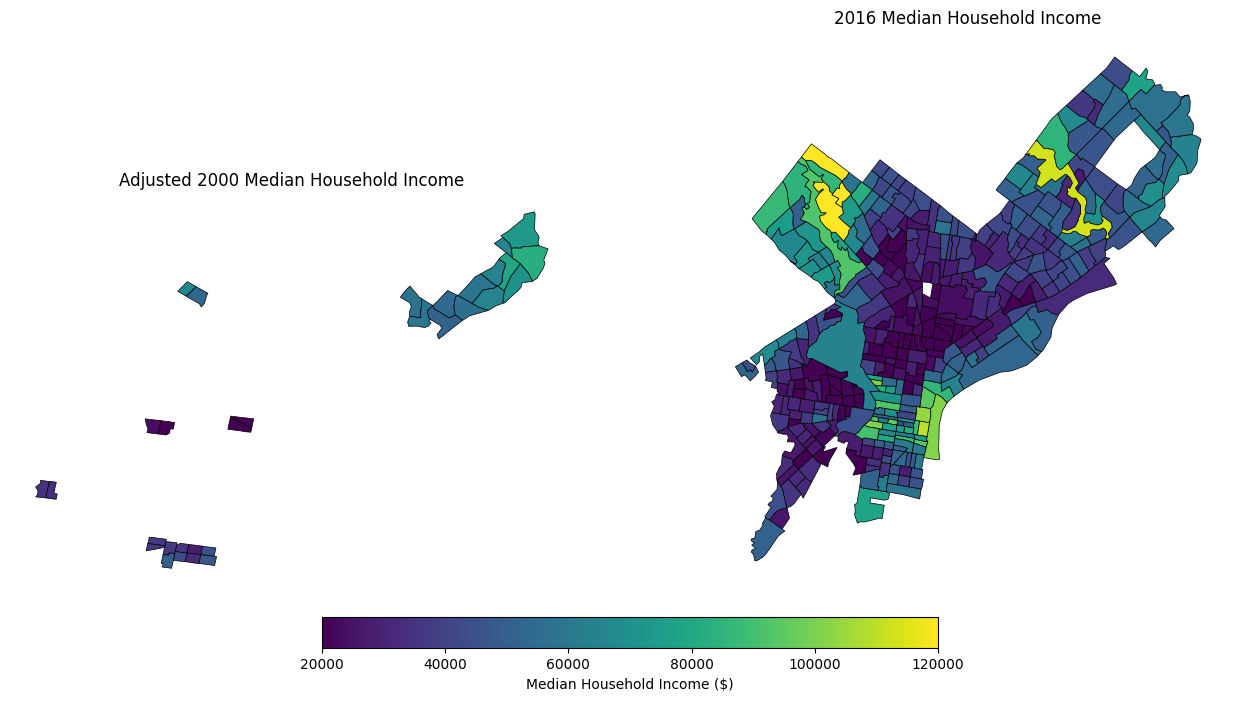

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create figure and axes
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Define a common color scale
norm = mcolors.Normalize(vmin=20000, vmax=120000)
cmap = 'viridis'

# Plot Adjusted 2000 Incomes
inc00sh.plot(column='income_2000_adj', cmap=cmap, linewidth=0.5, edgecolor='black',
             legend=False, norm=norm, ax=ax[0])
ax[0].set_title('Adjusted 2000 Median Household Income')
ax[0].axis('off')

# Plot 2016 Incomes
inc16sh.plot(column='income_2016', cmap=cmap, linewidth=0.5, edgecolor='black',
             legend=False, norm=norm, ax=ax[1])
ax[1].set_title('2016 Median Household Income')
ax[1].axis('off')

# Add a shared colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.05)
cbar.set_label('Median Household Income ($)')

plt.show()


We can already see some differences popping out, especially with respect to Center City (and Fishtown) and North Philadelphia.  To properly visulize those, we'd like to take the difference of these two maps.

### **PART 3 - Interpolating the 2000 data on 2016 Locations**

In class, merging the 2000 data into the 2016 GeoDataFrame resulted in a lot of dropped census tracts b/c the definition of the census tracts changed over time.  To recover those, we need an estimate of the adjusted 2000 income value at each 2016 census tract.  We can do this by interpolating (using Gaussian Process Regression [aka Kriging]) the adjusted 2000 values onto the 2016 locations.

<b> Import the GaussianProcessRegressor model as well as the ConstantKernel and RBF kernels. </b>

In [ ]:
!pip install scikit-learn --upgrade


<b> As we did in class, create the features (lat/lon) and target (2000 adjusted median incomes) for the model from the `inc00sh` GeoDataFrame. </b>

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

# Extract latitude and longitude from the geometry column
inc00sh['lon'] = inc00sh.geometry.centroid.x
inc00sh['lat'] = inc00sh.geometry.centroid.y

# Define features (longitude, latitude) and target (adjusted 2000 median income)
X_train = inc00sh[['lon', 'lat']].values  # Features
y_train = inc00sh['income_2000_adj'].values  # Target

# Confirm extraction
print(X_train[:5], y_train[:5])



[[-79.83264369  42.22814031]
 [-79.82694889  42.15003901]
 [-79.83333189  42.21337909]
 [-79.94133041  42.18581494]
 [-79.93653747  42.13772771]] [nan nan nan nan nan]


As always, the features need to be standardized.

<b> Standardize the features array across objects and standardize the target. </b>

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features (longitude, latitude)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)

# Standardize the target (adjusted 2000 median income)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()

print("First 5 standardized feature rows:", X_train_scaled[:5])
print("First 5 standardized target values:", y_train_scaled[:5])


Standardization complete!
First 5 standardized feature rows: [[-1.30660999  3.27639566]
 [-1.30377424  3.13085065]
 [-1.30695269  3.24888752]
 [-1.36073111  3.19752058]
 [-1.35834444  3.10790803]]
First 5 standardized target values: [nan nan nan nan nan]


<b> Fit a GPR model to the standardized 2000 data (remember to intialize the kernel).</b>

In [ ]:
import numpy as np

print("Number of NaN values in y_train:", np.isnan(y_train).sum())
print("Number of NaN values in y_train_scaled:", np.isnan(y_train_scaled).sum())


Number of NaN values in y_train: 3116
Number of NaN values in y_train_scaled: 3116


In [ ]:
# Remove NaN values
mask = ~np.isnan(y_train)  # Create a mask to filter non-NaN values
X_train_clean = X_train_scaled[mask]
y_train_clean = y_train_scaled[mask]

print("Removed NaN values. New dataset sizes:")
print("X_train_clean shape:", X_train_clean.shape)
print("y_train_clean shape:", y_train_clean.shape)


Removed NaN values. New dataset sizes:
X_train_clean shape: (31, 2)
y_train_clean shape: (31,)


In [ ]:
# Initialize the kernel for Gaussian Process Regression
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Initialize and fit the Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr.fit(X_train_clean, y_train_clean)

print("Gaussian Process Regression model fitted successfully!")


Gaussian Process Regression model fitted successfully!


/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


The model has now been fit to the 2000 adjusted median income data at the 2000 census tract locations.  Now we want to interpolate onto the 2016 positions.

<b> Create features for the 2016 census tract positions making sure to standardize. </b>

In [ ]:
# Ensure geometries are in the correct format
inc16sh = inc16sh.to_crs(epsg=4326)

# Extract latitude and longitude from the geometry column
inc16sh['lon'] = inc16sh.geometry.centroid.x
inc16sh['lat'] = inc16sh.geometry.centroid.y

# Define features (longitude, latitude) for the 2016 positions
X_2016 = inc16sh[['lon', 'lat']].values

# Standardize using the same scaler from the training data
X_2016_scaled = scaler_X.transform(X_2016)




<ipython-input-32-e06dfdf828ee>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inc16sh['lon'] = inc16sh.geometry.centroid.x
<ipython-input-32-e06dfdf828ee>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  inc16sh['lat'] = inc16sh.geometry.centroid.y


<b> Interpolate the trained model onto these positions using the `.predict()` method. </b>

In [ ]:
# Predict the interpolated values for the 2016 census tract positions
y_2016_pred_scaled = gpr.predict(X_2016_scaled)

# Reverse the standardization to get the predictions in the original scale
y_2016_pred = scaler_y.inverse_transform(y_2016_pred_scaled.reshape(-1, 1)).flatten()

# Store the predicted values in the 2016 census tract GeoDataFrame
inc16sh['income_2000_interp'] = y_2016_pred

# Confirm interpolation
print(inc16sh[['GEOID', 'income_2000_interp']].head())

         GEOID  income_2000_interp
0  42101010200        46791.733529
1  42101011900        47767.837177
2  42101013900        48001.886144
3  42101015700        47818.459681
4  42101016300        32380.419958


<b> Unstandardize these values so that they are real dollars and put those into a column in `inc16sh` called `"income_2000_interp"`. </b>

In [ ]:
# Reverse the standardization to get the predictions in real dollar values
inc16sh['income_2000_interp'] = scaler_y.inverse_transform(y_2016_pred_scaled.reshape(-1, 1)).flatten()

# Confirm the unstandardized values are stored correctly
print(inc16sh[['GEOID', 'income_2000_interp']].head())


         GEOID  income_2000_interp
0  42101010200        46791.733529
1  42101011900        47767.837177
2  42101013900        48001.886144
3  42101015700        47818.459681
4  42101016300        32380.419958


So now we have a column of interpolated values of the 2000 adjusted incomes at the locations of the 2016 census tracts.

<b> Make a map of the difference between the 2016 median income and the adjusted 2000 median income using the `coolwarm` color map, `vmin=-20000` and `vmax=20000`. </b>

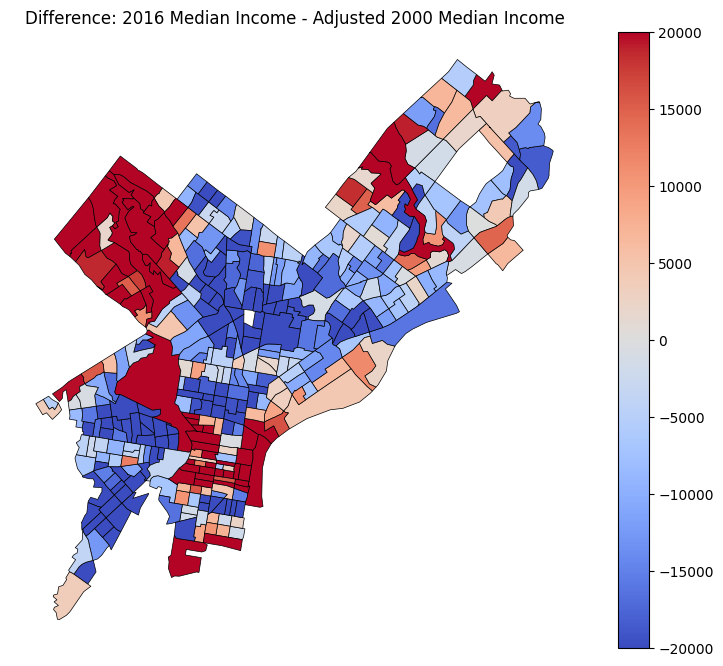

In [ ]:
import matplotlib.pyplot as plt

# Compute the difference between 2016 median income and interpolated 2000 income
inc16sh['income_diff'] = inc16sh['income_2016'] - inc16sh['income_2000_interp']

# Plot the difference map
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
inc16sh.plot(column='income_diff', cmap='coolwarm', linewidth=0.5, edgecolor='black',
             legend=True, vmin=-20000, vmax=20000, ax=ax)

# Add title and remove axis
ax.set_title('Difference: 2016 Median Income - Adjusted 2000 Median Income')
ax.axis('off')

# Show the plot
plt.show()


**Describe the spatial similarity between this map and the map of 2000/2016 demographic differences we derived in class.**

### **Spatial Similarity**  
- **Gentrification Hotspots**: Areas with **income increases (red zones)** align with **white population growth**, indicating **gentrification and displacement**.  
- **Income Decline & Stability**: **Stagnant or declining income areas (blue zones)** overlap with **stable or decreasing white populations**, reflecting **economic stagnation or disinvestment**.  
- **Neighborhood Trends**:  
  - **West & North Philadelphia** show **strong correlations** between rising incomes and white population increases.  
  - **Southwest & Northeast Philadelphia** display mixed trends, where **income stagnation aligns with minimal demographic shifts**.  
- **Key Takeaways**:  
  - **Higher income growth** → **White population increase (gentrification)**.  
  - **Income stagnation/decline** → **Little demographic change, marginalized communities remain dominant**.